In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# Weather data

In [11]:
weather = pd.read_csv('data/environment/ninja_weather_55.6838_12.5354_uncorrected.csv',header=3)

In [13]:
weather.index = weather.time

In [14]:
weather

,time,local_time,temperature,radiation_surface
time,,,,
2014-01-01 00:00,2014-01-01 00:00,2014-01-01 01:00,2.118,0.0
2014-01-01 01:00,2014-01-01 01:00,2014-01-01 02:00,2.147,0.0
2014-01-01 02:00,2014-01-01 02:00,2014-01-01 03:00,2.324,0.0
2014-01-01 03:00,2014-01-01 03:00,2014-01-01 04:00,2.344,0.0
2014-01-01 04:00,2014-01-01 04:00,2014-01-01 05:00,2.384,0.0
...,...,...,...,...
2014-12-31 19:00,2014-12-31 19:00,2014-12-31 20:00,3.075,0.0
2014-12-31 20:00,2014-12-31 20:00,2014-12-31 21:00,3.164,0.0
2014-12-31 21:00,2014-12-31 21:00,2014-12-31 22:00,3.210,0.0


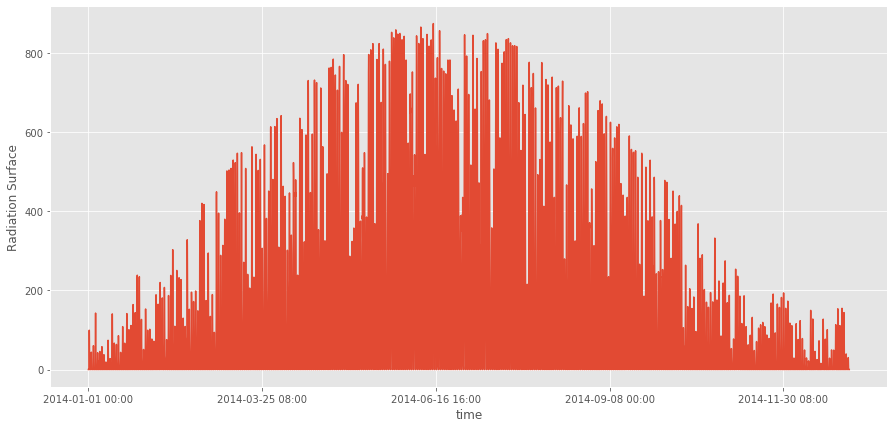

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Radiation Surface')
weather.loc[:,'radiation_surface'].plot(ax=ax)

In [26]:
weather.describe()

,temperature,radiation_surface
count,8760.000000,8760.000000
mean,9.996626,133.634475
std,6.662291,211.872905
min,-6.557000,0.000000
25%,4.353250,0.000000
50%,10.026500,4.391500
75%,15.174500,190.447000
max,26.763000,875.069000


In [36]:
start = pd.to_datetime('2014-05-01', infer_datetime_format=True)
end = pd.to_datetime('2014-05-02', infer_datetime_format=True)
time = pd.to_datetime(weather['time'], infer_datetime_format=True)
weather['time']=time

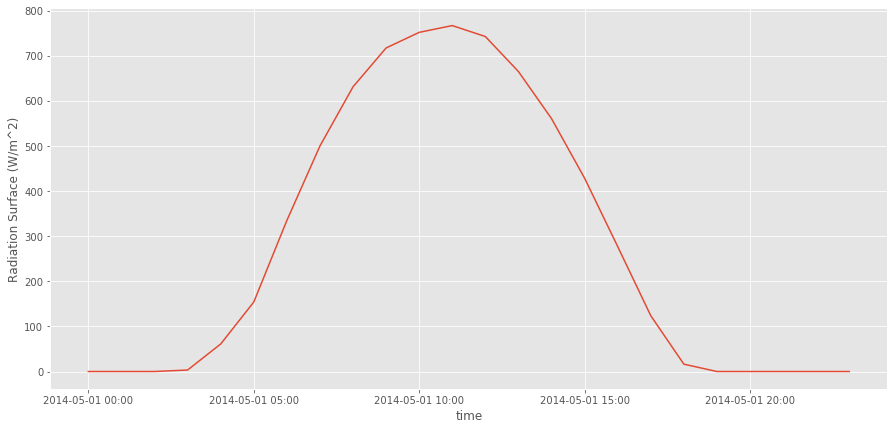

In [38]:

f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Radiation Surface (W/m^2)')
weather.loc[(weather['time'] < end) & (weather['time'] >= start),'radiation_surface'].plot(ax=ax)

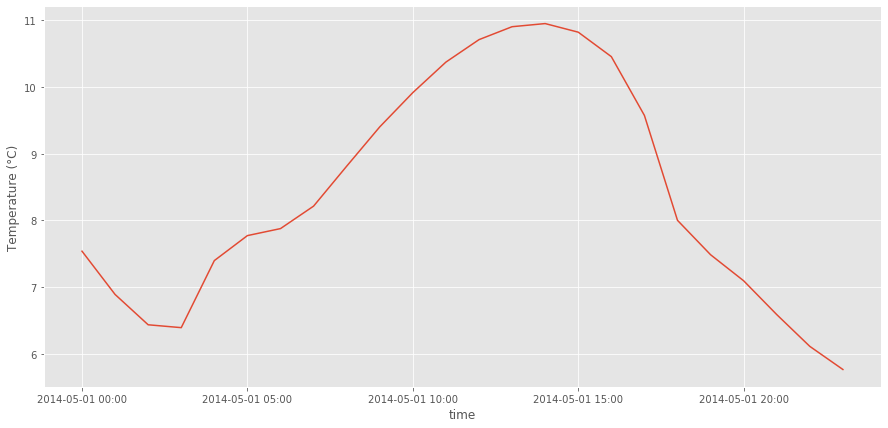

In [39]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature (°C)')
weather.loc[(weather['time'] < end) & (weather['time'] >= start),'temperature'].plot(ax=ax)

In [53]:
import random
random_day = random.randint(0,363)*24
weather.iloc[random_day:random_day+24,2][3]#.loc['temperature']

6.492000000000001

# Electricity prices

In [32]:
prices = pd.read_excel('data/environment/2018_spot_prices.xlsx')

In [33]:
prices['hour']=prices['Hours'].map(lambda x: x.split('-')[0].strip())

In [34]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT,string_date,hour
0,2018-01-01 00:00:00,00 - 01,"26,31","26,33","26,33","26,33","26,33","26,33","21,80","26,33",...,"26,33","26,33","26,33","26,33","26,33","26,33","26,33","26,33",01/01/2018,00
1,2018-01-01 00:00:00,01 - 02,"26,43","26,43","26,43","26,43","26,43","26,43","26,43","26,43",...,"26,43","26,43","26,43","26,43","26,43","26,43","26,43","26,43",01/01/2018,01
2,2018-01-01 00:00:00,02 - 03,"26,09","26,10","26,10","26,10","26,10","26,10","26,10","26,10",...,"26,10","26,10","26,10","26,10","26,10","26,10","26,10","26,10",01/01/2018,02
3,2018-01-01 00:00:00,03 - 04,"24,63","24,70","24,70","24,70","24,70","24,70","24,70","24,70",...,"24,70","24,70","24,70","24,70","24,70","24,70","24,70","24,70",01/01/2018,03
4,2018-01-01 00:00:00,04 - 05,"24,67","24,74","24,74","24,74","24,74","24,74","24,74","24,74",...,"24,74","24,74","24,74","24,74","24,74","24,74","24,74","24,74",01/01/2018,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2018,19 - 20,"48,83","47,51","47,51","47,51","47,51","47,51","47,51","47,51",...,"50,66","50,66","47,51","47,51","47,51","47,51","47,51","47,51",31-12-2018,19
8757,31-12-2018,20 - 21,"47,23","45,82","45,82","45,82","45,82","45,82","45,82","45,82",...,"49,66","49,66","45,82","45,82","45,82","45,82","45,82","45,82",31-12-2018,20
8758,31-12-2018,21 - 22,"46,02","43,03","43,03","43,03","43,03","43,03","43,03","43,03",...,"49,05","49,05","45,41","45,41","45,41","43,03","43,03","43,03",31-12-2018,21
8759,31-12-2018,22 - 23,"45,55","38,54","38,54","38,54","38,54","38,54","38,54","38,54",...,"49,32","49,32","43,97","43,97","43,97","38,54","38,54","38,54",31-12-2018,22


In [35]:
def extract_date(x,column):
    if column == 1:
        try: 
            return x.split('/')[1]
        except: 
            return x.split('-')[1]
    else:
        try: 
            x.split('/')[1]
            return x.split('/')[0]
        except: 
            return x.split('-')[0]
prices['year']='2018'
prices['month']=prices['string_date'].map(lambda x: extract_date(x,1))
prices['day']=prices['string_date'].map(lambda x: extract_date(x,0))

In [27]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Tr.heim,Tromsø,EE,LV,LT,string_date,hour,year,month,day
0,2018-01-01 00:00:00,00 - 01,"26,31","26,33","26,33","26,33","26,33","26,33","21,80","26,33",...,"26,33","26,33","26,33","26,33","26,33",01/01/2018,00,2018,01,01
1,2018-01-01 00:00:00,01 - 02,"26,43","26,43","26,43","26,43","26,43","26,43","26,43","26,43",...,"26,43","26,43","26,43","26,43","26,43",01/01/2018,01,2018,01,01
2,2018-01-01 00:00:00,02 - 03,"26,09","26,10","26,10","26,10","26,10","26,10","26,10","26,10",...,"26,10","26,10","26,10","26,10","26,10",01/01/2018,02,2018,01,01
3,2018-01-01 00:00:00,03 - 04,"24,63","24,70","24,70","24,70","24,70","24,70","24,70","24,70",...,"24,70","24,70","24,70","24,70","24,70",01/01/2018,03,2018,01,01
4,2018-01-01 00:00:00,04 - 05,"24,67","24,74","24,74","24,74","24,74","24,74","24,74","24,74",...,"24,74","24,74","24,74","24,74","24,74",01/01/2018,04,2018,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2018,19 - 20,"48,83","47,51","47,51","47,51","47,51","47,51","47,51","47,51",...,"47,51","47,51","47,51","47,51","47,51",31-12-2018,19,2018,12,31
8757,31-12-2018,20 - 21,"47,23","45,82","45,82","45,82","45,82","45,82","45,82","45,82",...,"45,82","45,82","45,82","45,82","45,82",31-12-2018,20,2018,12,31
8758,31-12-2018,21 - 22,"46,02","43,03","43,03","43,03","43,03","43,03","43,03","43,03",...,"45,41","45,41","43,03","43,03","43,03",31-12-2018,21,2018,12,31
8759,31-12-2018,22 - 23,"45,55","38,54","38,54","38,54","38,54","38,54","38,54","38,54",...,"43,97","43,97","38,54","38,54","38,54",31-12-2018,22,2018,12,31


In [36]:
prices['date']=pd.to_datetime(prices[['year','month','day','hour']])

In [37]:
prices['DK2']=prices['DK2'].map(lambda x: float(x.replace(',','.')) if type(x)==str else x)

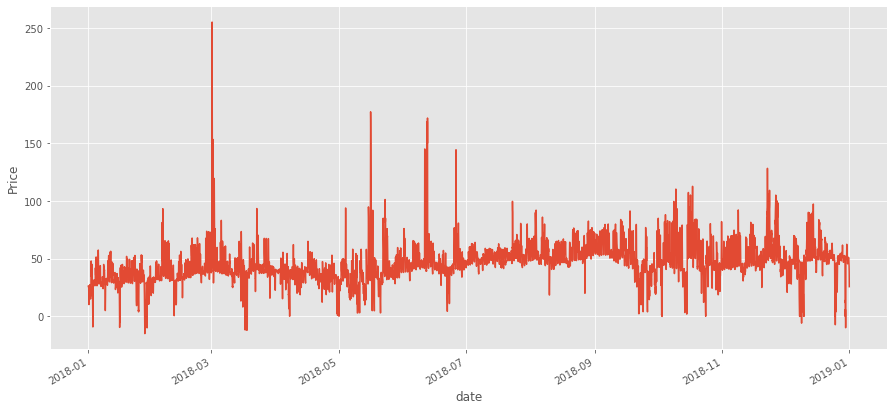

In [30]:
prices.index = prices.date
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Price')
prices.loc[:,'DK2'].plot(ax=ax)

In [39]:
jan_first = prices.loc[prices['date'] < pd.to_datetime('2018-01-02',infer_datetime_format=True)]

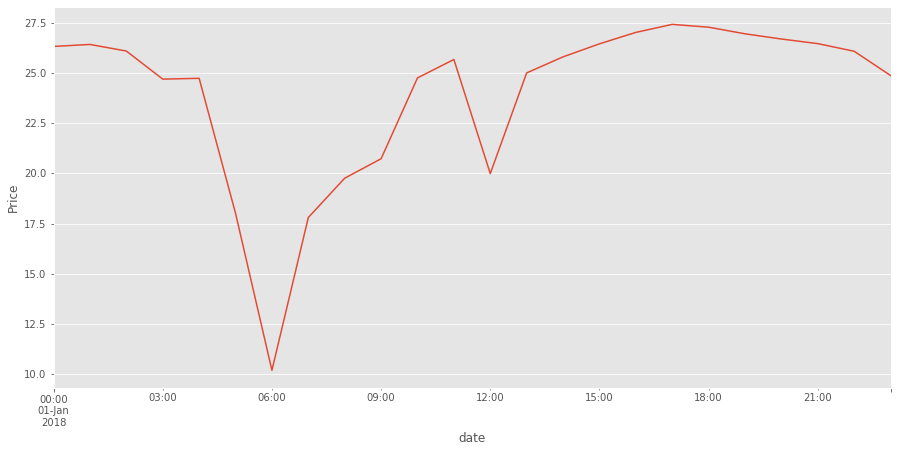

In [41]:
jan_first.index = jan_first.date
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Price')
jan_first.loc[:,'DK2'].plot(ax=ax)

In [42]:
prices.describe()

,DK2
count,8760.000000
mean,46.201628
std,16.720214
min,-15.000000
25%,37.410000
50%,45.520000
75%,53.682500
max,255.020000
